In [1]:
import pandas as pd 
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
import math
from scipy import stats

In [3]:
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [4]:
data = pd.read_csv('smoke_detection_iot.csv')
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [5]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [6]:
data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [7]:
data.shape

(62630, 15)

In [8]:
data.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [9]:
# checking the data types of the columns 
# Check if we need to correct the datatypes inferred by python by default 

In [10]:
data.dtypes

UTC                 int64
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int64
Fire Alarm          int64
dtype: object

In [11]:
# based on the data description file , data types for all the columns except CNT are correct 
# column CNT might behave as a categorical variable 

In [12]:
data['CNT'].value_counts()

0        5
866      5
774      5
773      5
772      5
        ..
12158    2
12157    2
12156    2
12155    2
24993    2
Name: CNT, Length: 24994, dtype: int64

In [13]:
data['CNT'].nunique()

24994

In [14]:
# based on the number of unique values in the column, we are going to use it as a numerical column

In [15]:
data.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [16]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [18]:
# checking for data imbalance 

In [19]:
data['Fire Alarm'].value_counts()

1    44757
0    17873
Name: Fire Alarm, dtype: int64

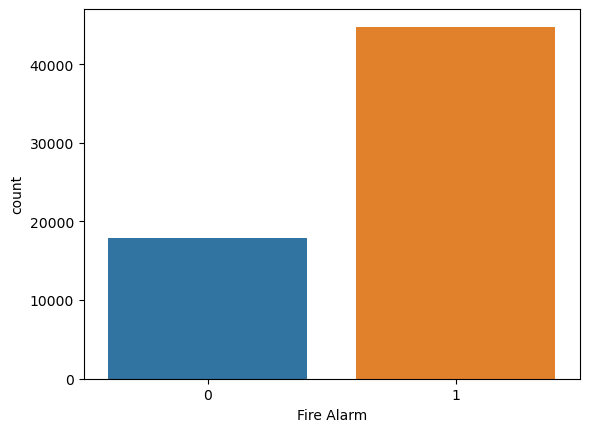

In [20]:
sns.countplot(data['Fire Alarm'])
plt.show()

In [21]:
# Imbalance = Number of records in the dataset with target as 1 vs number of records with target 0
# we are going to use oversampling technique to balance the dataset before we apply the classification models
# We will balance the data after some more EDA (exploratory data analysis) and data cleaning 

In [22]:
# This imbalance can cause the model to be biased towards predicting one class (majority class) over the other 

In [23]:
# Checking distribution of each column

Distribution plot for :  UTC


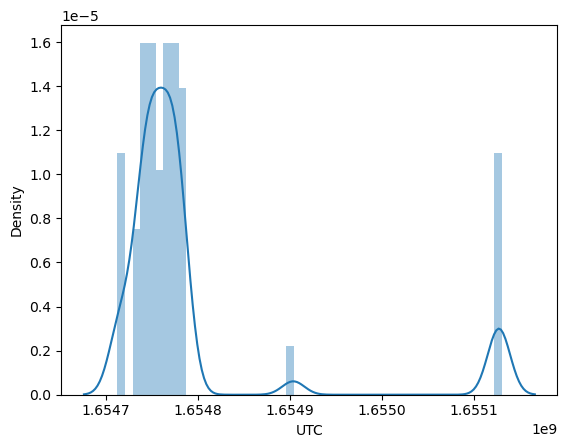

Distribution plot for :  Temperature[C]


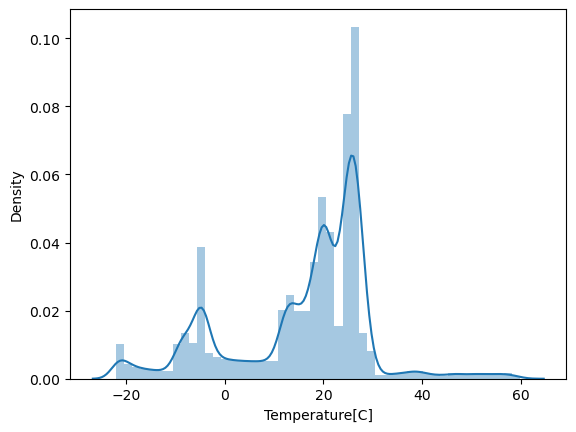

Distribution plot for :  Humidity[%]


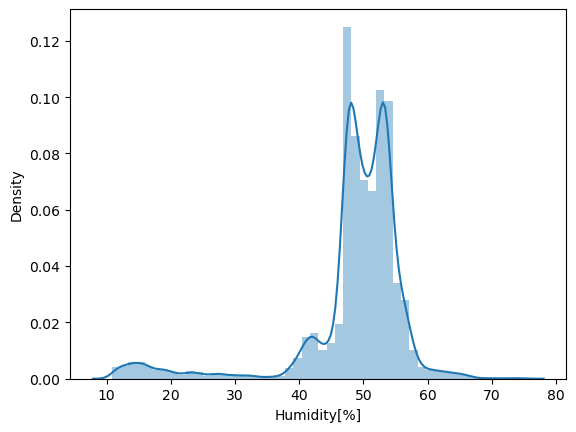

Distribution plot for :  TVOC[ppb]


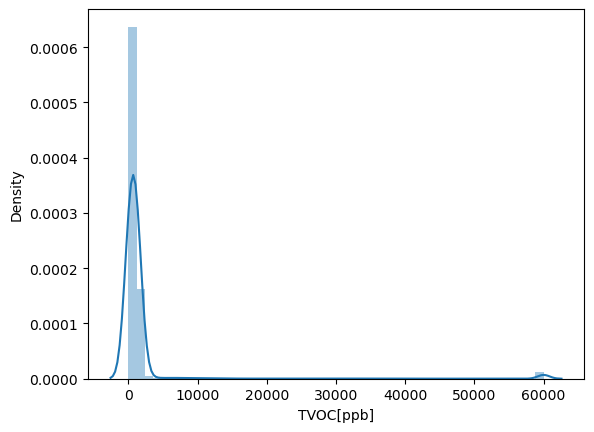

Distribution plot for :  eCO2[ppm]


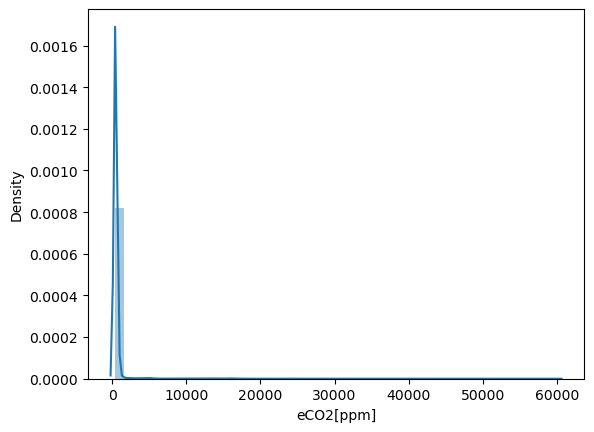

Distribution plot for :  Raw H2


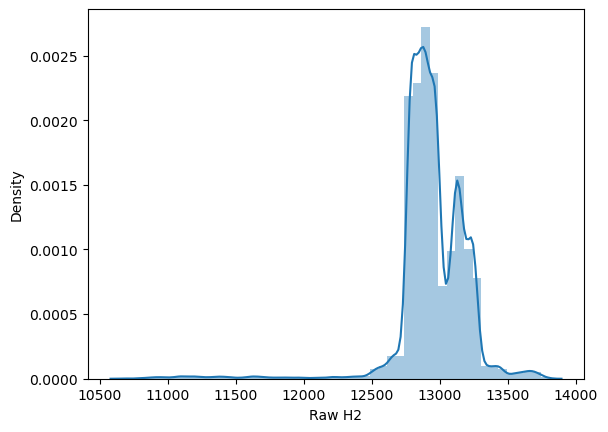

Distribution plot for :  Raw Ethanol


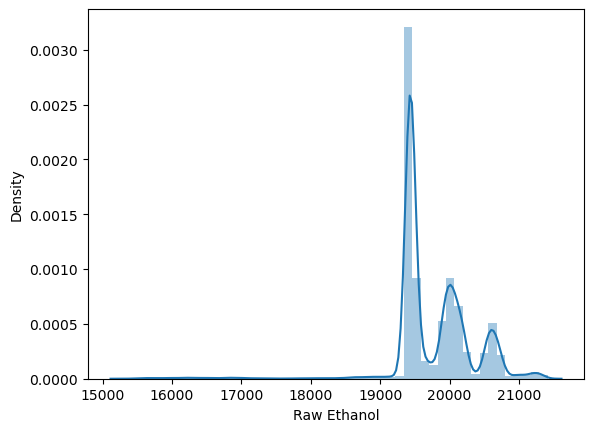

Distribution plot for :  Pressure[hPa]


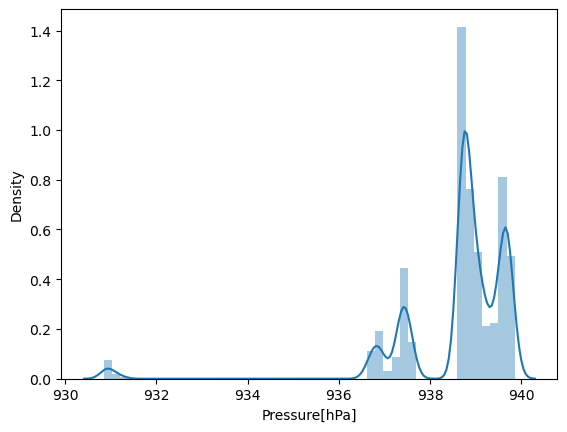

Distribution plot for :  PM1.0


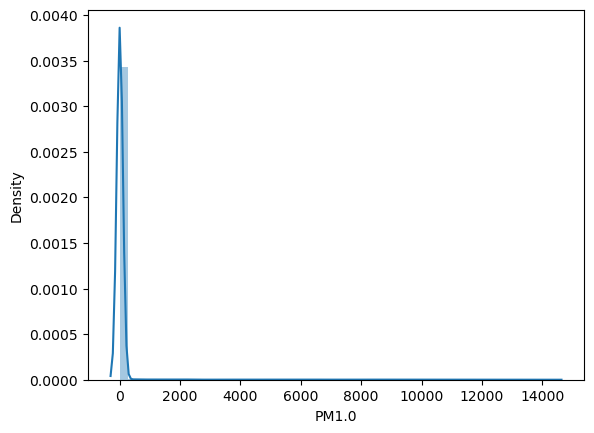

Distribution plot for :  PM2.5


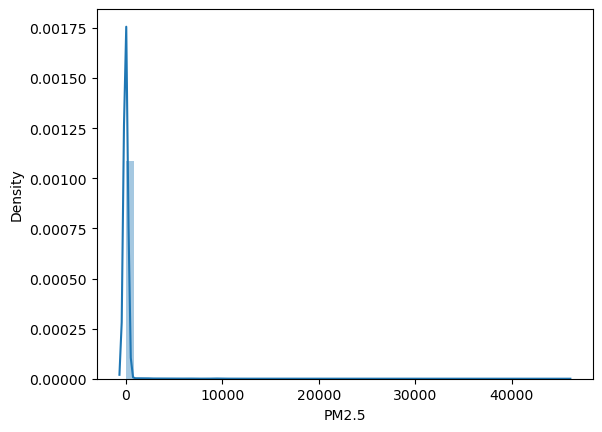

Distribution plot for :  NC0.5


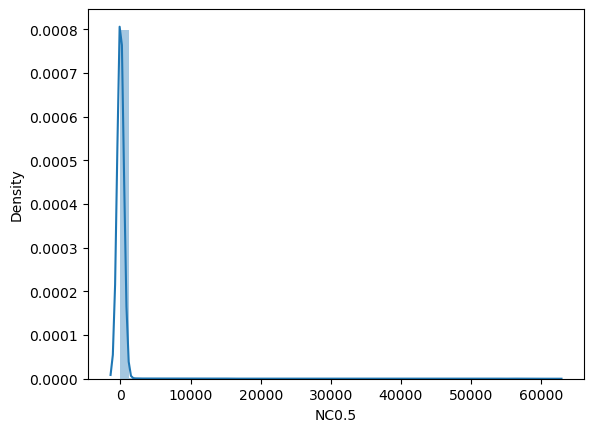

Distribution plot for :  NC1.0


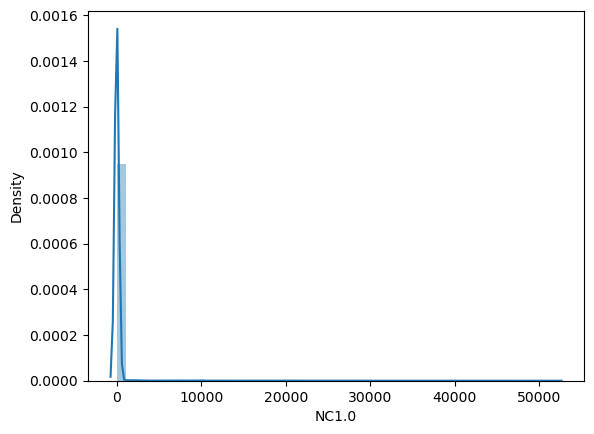

Distribution plot for :  NC2.5


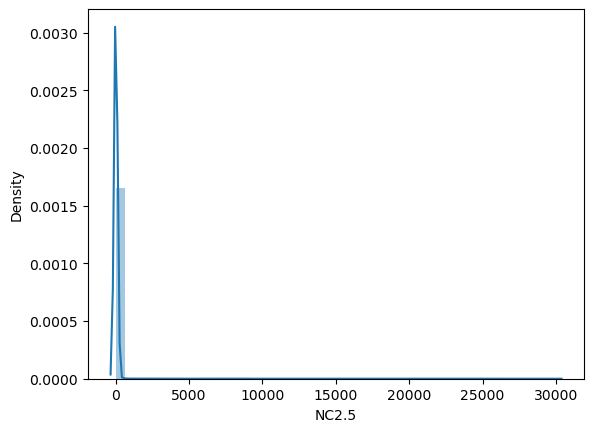

Distribution plot for :  CNT


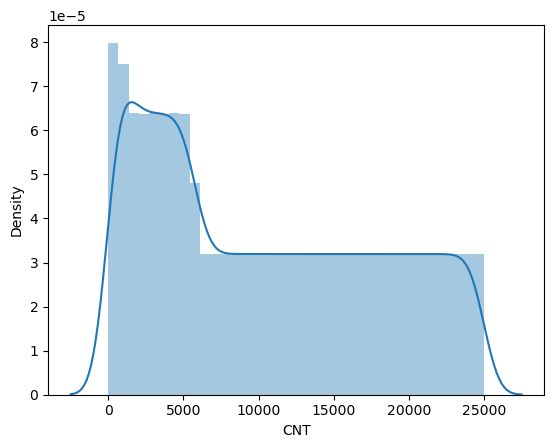

In [24]:
for col in features.columns:
    print('Distribution plot for : ', col)
    sns.distplot(features[col])
    plt.show()

In [25]:
# data for some of the columns is not normally distributed. We are going to apply some transformations to bring it closer
# to a normal distribution

# There are outliers in some columns as well , that we will remove as well

In [26]:
# Column UTC

<AxesSubplot:xlabel='UTC'>

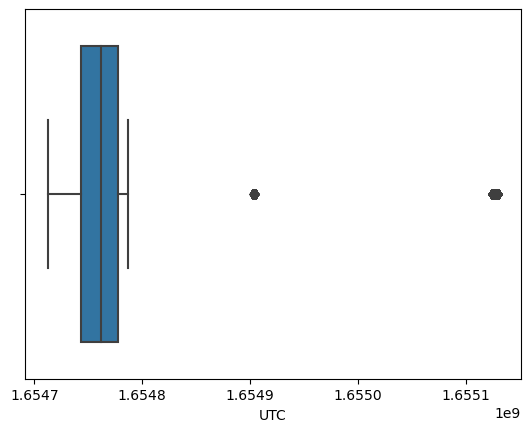

In [27]:
sns.boxplot(data['UTC'])

In [28]:
# Checking how many data points we would lose if we remove the outliers 

In [29]:
iqr = np.percentile(data['UTC'], 75) - np.percentile(data['UTC'], 25)
upper_limit = np.percentile(data['UTC'], 75) + 10*iqr
lower_limit = np.percentile(data['UTC'], 25) - 1.5*iqr
outliers = data[(data['UTC']>upper_limit )]
len(outliers)

5744

In [30]:
# simce we would lose a lot of data , we will not remove these outliers from this column

<AxesSubplot:xlabel='Pressure[hPa]', ylabel='Density'>

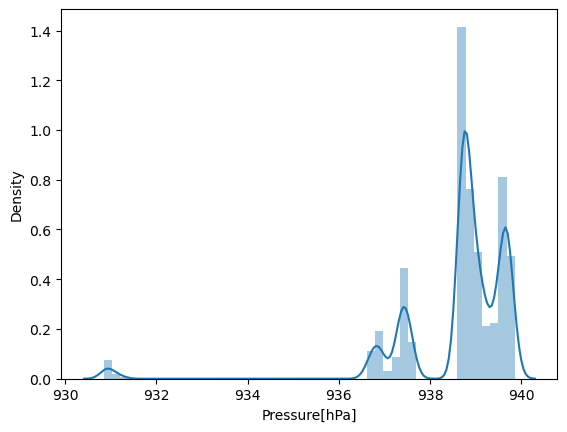

In [31]:
sns.distplot(data['Pressure[hPa]'])

<AxesSubplot:xlabel='Pressure[hPa]'>

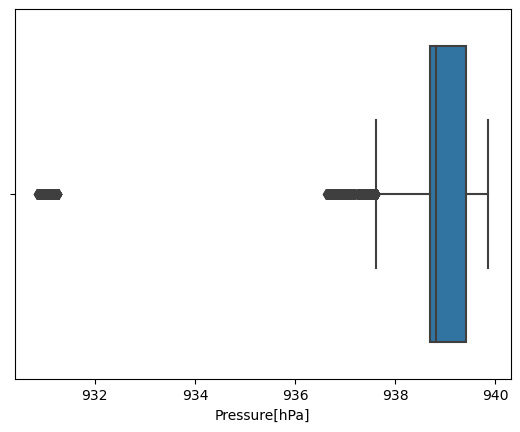

In [32]:
sns.boxplot(data['Pressure[hPa]'])

In [33]:
# this column has outliers 

In [34]:
iqr = np.percentile(data['Pressure[hPa]'], 75) - np.percentile(data['Pressure[hPa]'], 25)
upper_limit = np.percentile(data['Pressure[hPa]'], 75) + 1.5*iqr
lower_limit = np.percentile(data['Pressure[hPa]'], 25) - 1.5*iqr
outliers = data[(data['Pressure[hPa]']>upper_limit )| (data['Pressure[hPa]']<lower_limit)]
len(outliers)

12632

In [35]:
# We will adjust the limits to ensure that we do not lose too many data points 

In [36]:
iqr = np.percentile(data['Pressure[hPa]'], 75) - np.percentile(data['Pressure[hPa]'], 25)
upper_limit = np.percentile(data['Pressure[hPa]'], 75) + 1.5*iqr
lower_limit = np.percentile(data['Pressure[hPa]'], 25) - 3*iqr
outliers = data[(data['Pressure[hPa]']>upper_limit )| (data['Pressure[hPa]']<lower_limit)]
len(outliers)

1154

In [37]:
# We will remove these records from the data

In [38]:
data.shape

(62630, 15)

In [39]:
data = data[(data['Pressure[hPa]']>lower_limit)&(data['Pressure[hPa]']<upper_limit)]
data.shape

(61476, 15)

In [40]:
data = data.reset_index(drop=True)

In [41]:
# no other column had outliers 

In [42]:
data.shape

(61476, 15)

In [43]:
# taking a sample of data for creating pairplots
# since it was taking too long to run the code 
data_sampled = data.sample(frac=0.1)

In [45]:
# sns.pairplot(data_sampled)

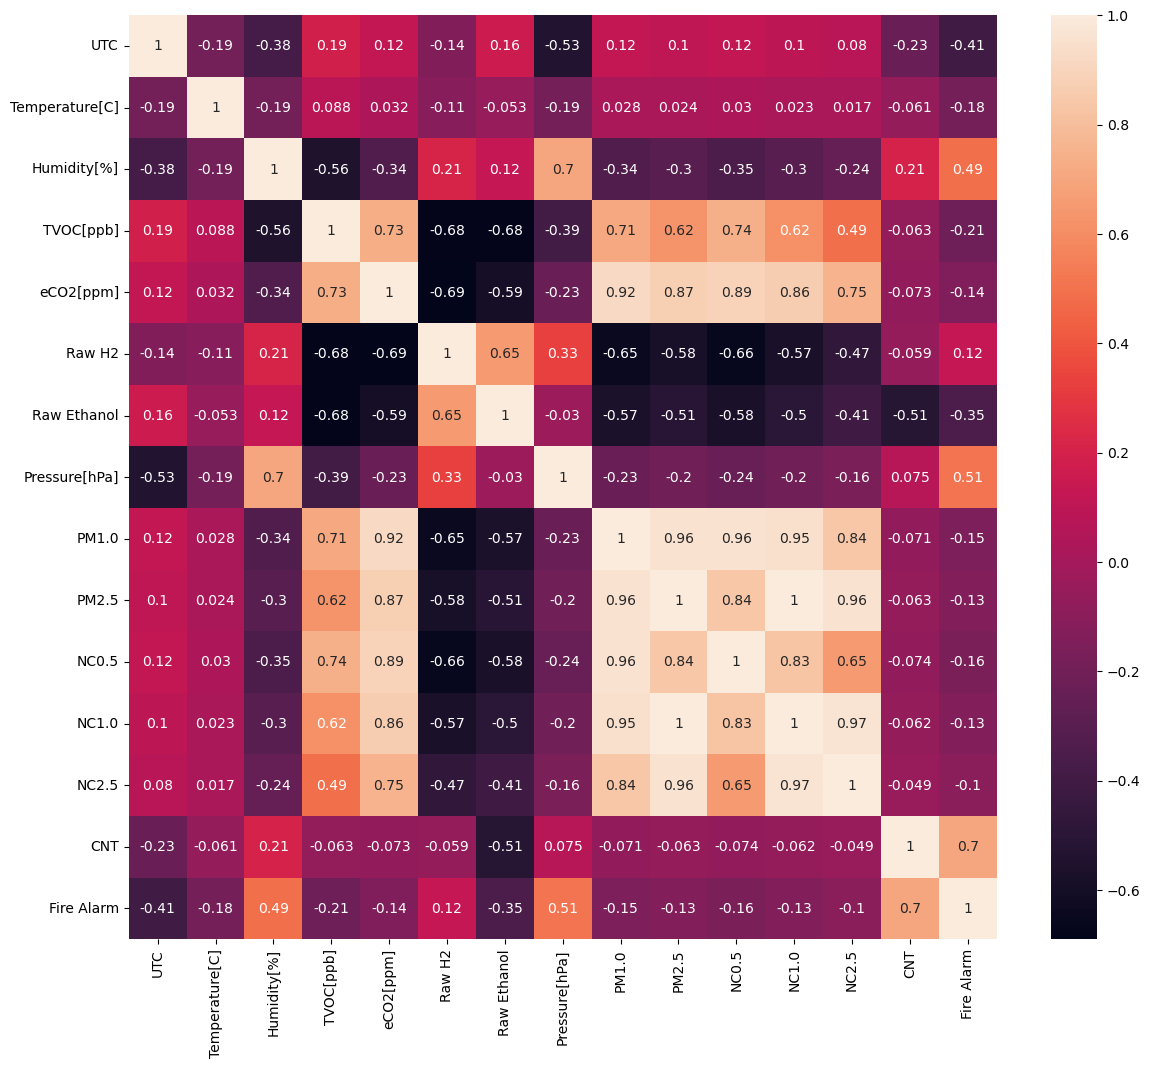

In [46]:
correlation = data.corr()
plt.figure(figsize = (14, 12))
sns.heatmap(correlation, annot = True)
plt.show()

In [49]:
# There are some columns that have extremely high correlation 
# columnms PM2.5 and NC1.0 have correlation of 1 
# Columns PM1.0 has high correlation with PM2.5 and NC1.0
# NC1.0 and NC2.5 have an extremely high correlation

In [47]:
# we wiil drop column PM2.5 and NC1.0

In [50]:
data = data.drop(['PM2.5', 'NC1.0'], axis = 1)

In [58]:
data.shape

(61476, 13)

Column: UTC


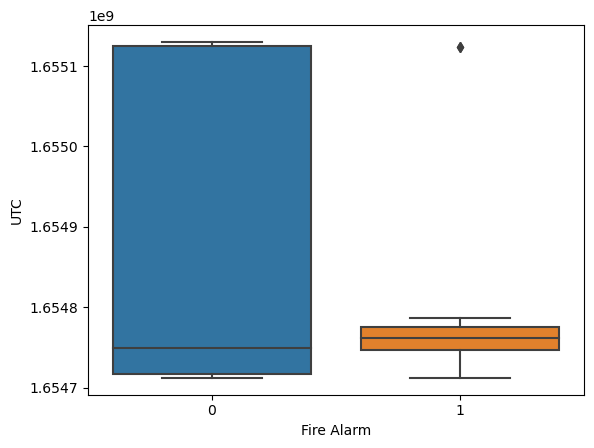

Column: Temperature[C]


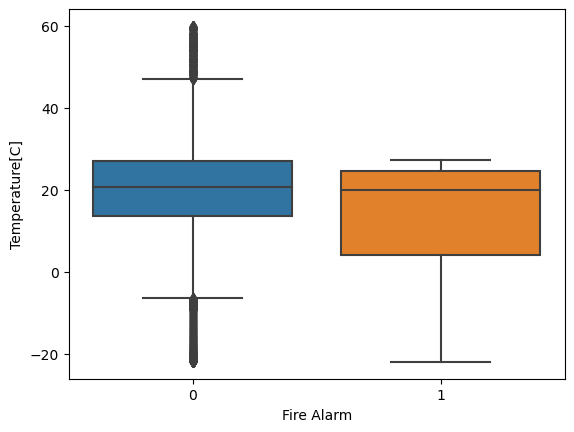

Column: Humidity[%]


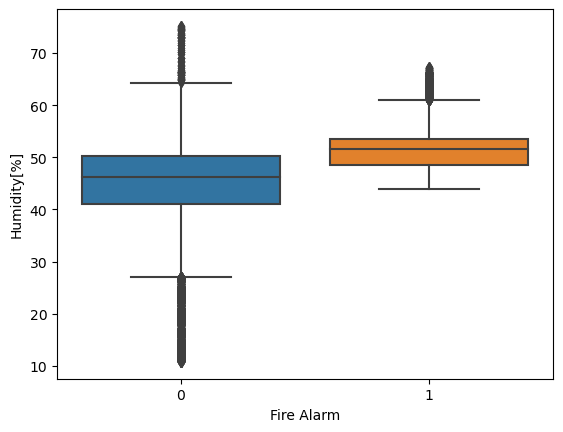

Column: TVOC[ppb]


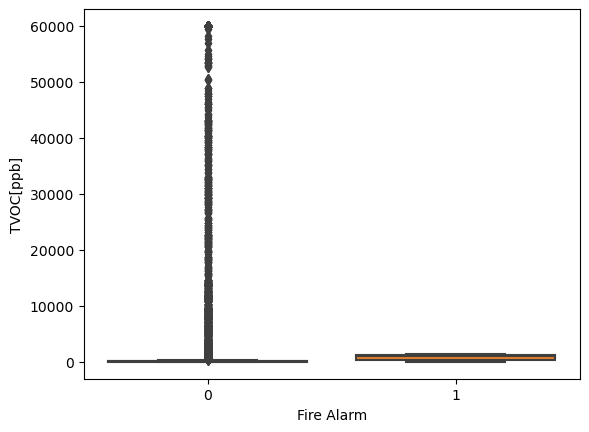

Column: eCO2[ppm]


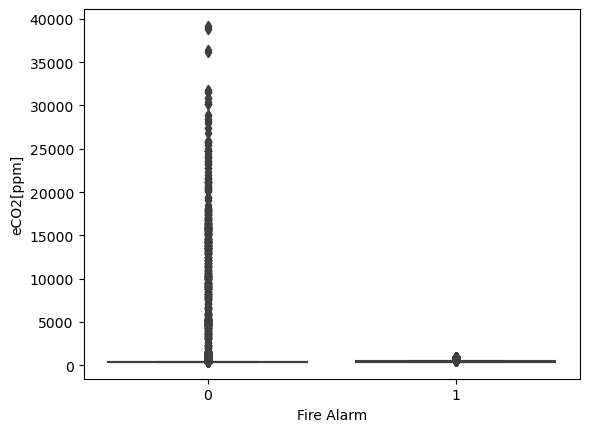

Column: Raw H2


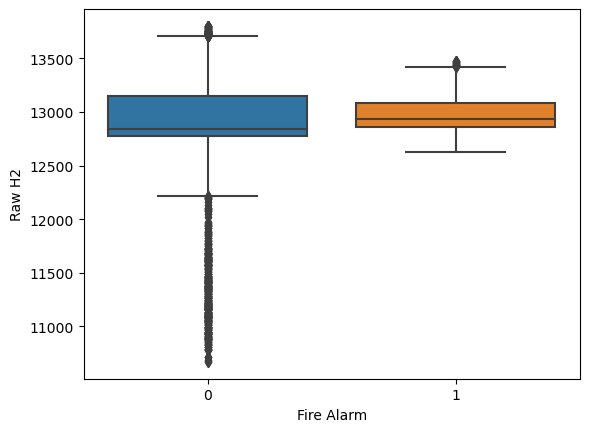

Column: Raw Ethanol


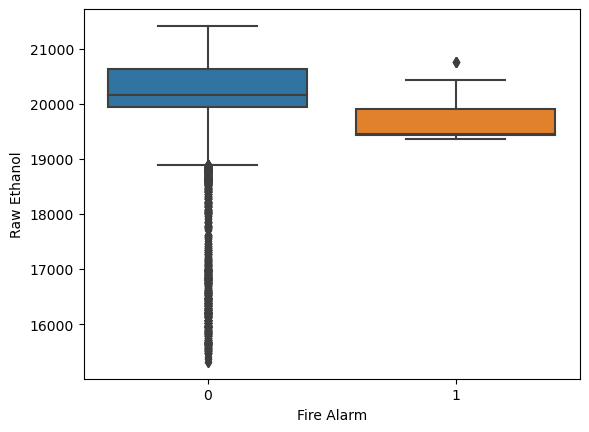

Column: Pressure[hPa]


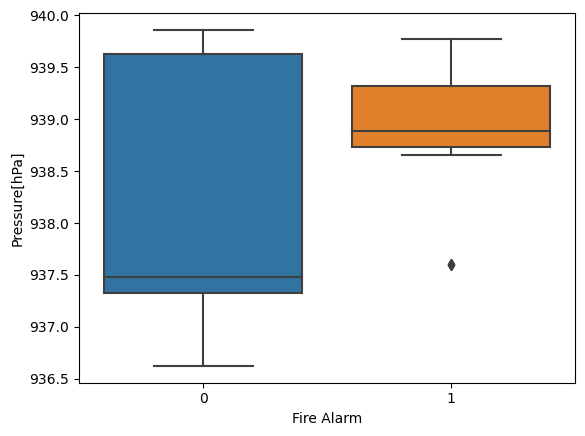

Column: PM1.0


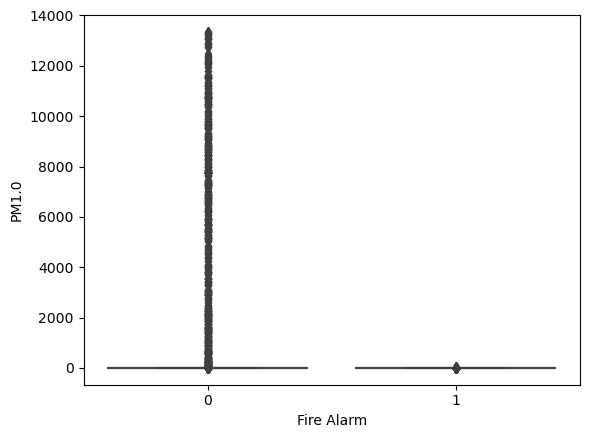

Column: NC0.5


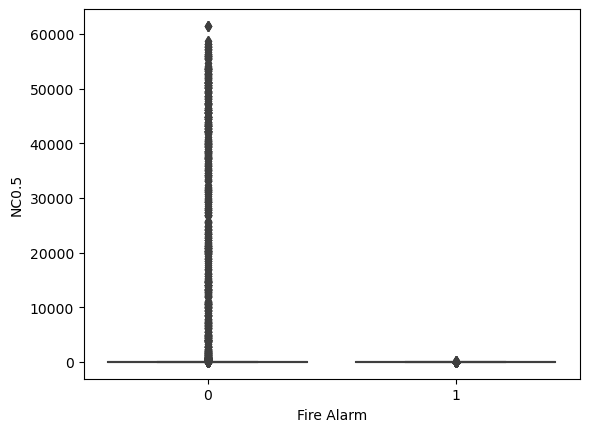

Column: NC2.5


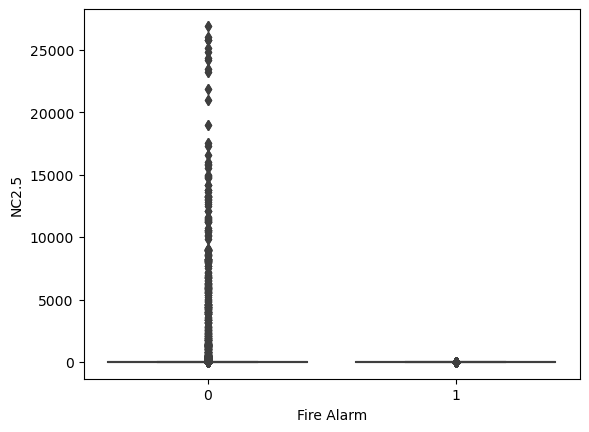

Column: CNT


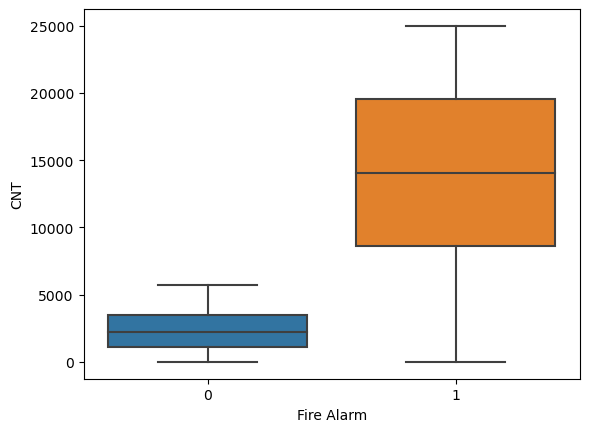

In [62]:
for col in data.columns:
    if col != 'Fire Alarm':
        print('Column:', col)
        sns.boxplot(x = data['Fire Alarm'], y = data[col])
        plt.show()

In [65]:
# from the box plot of UTC vs Fire Alarm, we can see that there are outliers when Fire_Alarm has the value 1

In [74]:
utc_fire_alarm_0 = data[data['Fire Alarm'] == 0]
utc_fire_alarm_0.shape

(17840, 13)

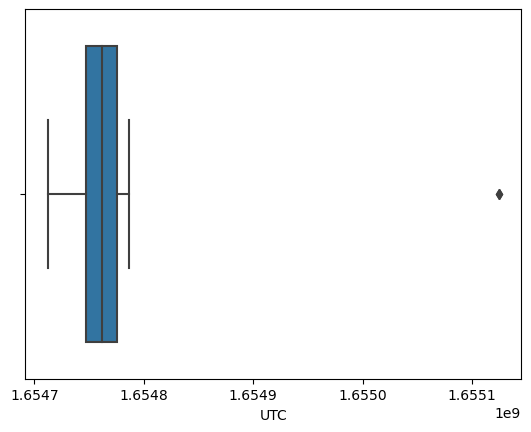

In [69]:
utc_fire_alarm_1 = data[data['Fire Alarm'] == 1]
sns.boxplot(utc_fire_alarm_1['UTC'])
plt.show()

In [75]:
utc_fire_alarm_1.shape

(43636, 13)

In [71]:
iqr = np.percentile(utc_fire_alarm_1['UTC'], 75) - np.percentile(utc_fire_alarm_1['UTC'], 25)
upper_limit = np.percentile(utc_fire_alarm_1['UTC'], 75) + 1.5*iqr
lower_limit = np.percentile(utc_fire_alarm_1['UTC'], 25) - 1.5*iqr
outliers = utc_fire_alarm_1[(utc_fire_alarm_1['UTC']>upper_limit )| (utc_fire_alarm_1['UTC']<lower_limit)]
len(outliers)

2

In [72]:
utc_fire_alarm_1_no_outliers = utc_fire_alarm_1[(utc_fire_alarm_1['UTC']> lower_limit)& (utc_fire_alarm_1['UTC']<upper_limit)]

In [73]:
utc_fire_alarm_1_no_outliers.shape

(43634, 13)

In [78]:
data = pd.concat([utc_fire_alarm_0, utc_fire_alarm_1_no_outliers], axis = 0).reset_index(drop=True).sample(frac=1)

In [79]:
data.shape

(61474, 13)

In [ ]:
# Using a similar process for the column 'Raw Ethanol'

In [80]:
raw_ethanol_fire_alarm_0 = data[data['Fire Alarm'] == 0]
raw_ethanol_fire_alarm_0.shape

(17840, 13)

In [81]:
raw_ethanol_fire_alarm_1= data[data['Fire Alarm'] == 1]
raw_ethanol_fire_alarm_1.shape

(43634, 13)

In [85]:
# Checking for the number of outliers 
iqr = np.percentile(raw_ethanol_fire_alarm_1['Raw Ethanol'], 75) - np.percentile(raw_ethanol_fire_alarm_1['Raw Ethanol'], 25)
upper_limit = np.percentile(raw_ethanol_fire_alarm_1['Raw Ethanol'], 75) + 1.5*iqr
lower_limit = np.percentile(raw_ethanol_fire_alarm_1['Raw Ethanol'], 25) - 1.5*iqr
outliers = raw_ethanol_fire_alarm_1[(raw_ethanol_fire_alarm_1['Raw Ethanol']>upper_limit )| (raw_ethanol_fire_alarm_1['Raw Ethanol']<lower_limit)]
len(outliers)

2

In [86]:
raw_ethanol_fire_alarm_1 = raw_ethanol_fire_alarm_1[(raw_ethanol_fire_alarm_1['Raw Ethanol']> lower_limit)& (raw_ethanol_fire_alarm_1['Raw Ethanol']<upper_limit)]

In [87]:
data = pd.concat([raw_ethanol_fire_alarm_0, raw_ethanol_fire_alarm_1], axis = 0).reset_index(drop=True).sample(frac=1)

In [98]:
data.shape

(61472, 13)

In [ ]:
# This is our clean dataset

In [105]:
data.to_csv('clean_data_smoke_detection')